In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [5]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

tickerData = yf.Ticker('AAPL')
df = tickerData.history(period='1d', start='2010-01-01', end='2019-12-31')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.461439,6.493833,6.429651,6.478998,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.496862,6.526833,6.455991,6.490201,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.490200,6.515933,6.380304,6.386964,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.410578,6.418146,6.328837,6.375156,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.366680,6.418147,6.329141,6.417541,447610800,0.0,0.0


In [6]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-23 00:00:00-05:00,68.325317,69.231353,68.286347,69.170464,98572000,0.0,0.0
2019-12-24 00:00:00-05:00,69.338527,69.387241,68.907432,69.236229,48478800,0.0,0.0
2019-12-26 00:00:00-05:00,69.370192,70.626952,69.340966,70.609901,93121200,0.0,0.0
2019-12-27 00:00:00-05:00,70.904605,71.598747,70.173931,70.583107,146266000,0.0,0.0
2019-12-30 00:00:00-05:00,70.500285,71.286980,69.467602,71.002014,144114400,0.0,0.0


In [7]:
df = df.reset_index()

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,6.461439,6.493833,6.429651,6.478998,493729600,0.0,0.0
1,2010-01-05 00:00:00-05:00,6.496862,6.526833,6.455991,6.490201,601904800,0.0,0.0
2,2010-01-06 00:00:00-05:00,6.490200,6.515933,6.380304,6.386964,552160000,0.0,0.0
3,2010-01-07 00:00:00-05:00,6.410578,6.418146,6.328837,6.375156,477131200,0.0,0.0
4,2010-01-08 00:00:00-05:00,6.366680,6.418147,6.329141,6.417541,447610800,0.0,0.0


In [11]:
df = df.drop(['Date', 'Dividends', 'Stock Splits'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,6.461439,6.493833,6.429651,6.478998,493729600
1,6.496862,6.526833,6.455991,6.490201,601904800
2,6.490200,6.515933,6.380304,6.386964,552160000
3,6.410578,6.418146,6.328837,6.375156,477131200
4,6.366680,6.418147,6.329141,6.417541,447610800


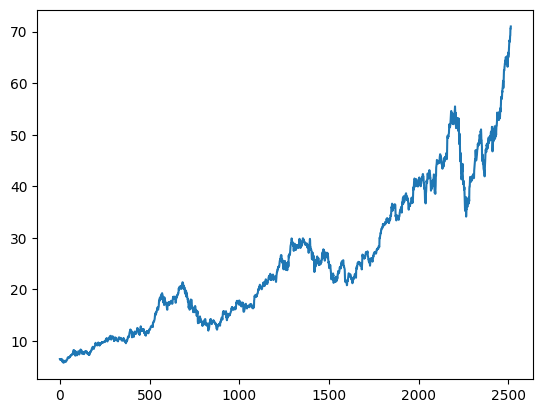

In [12]:
plt.plot(df.Close)

In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    57.556338
2511    57.755156
2512    57.993546
2513    58.222815
2514    58.451338
Name: Close, Length: 2515, dtype: float64

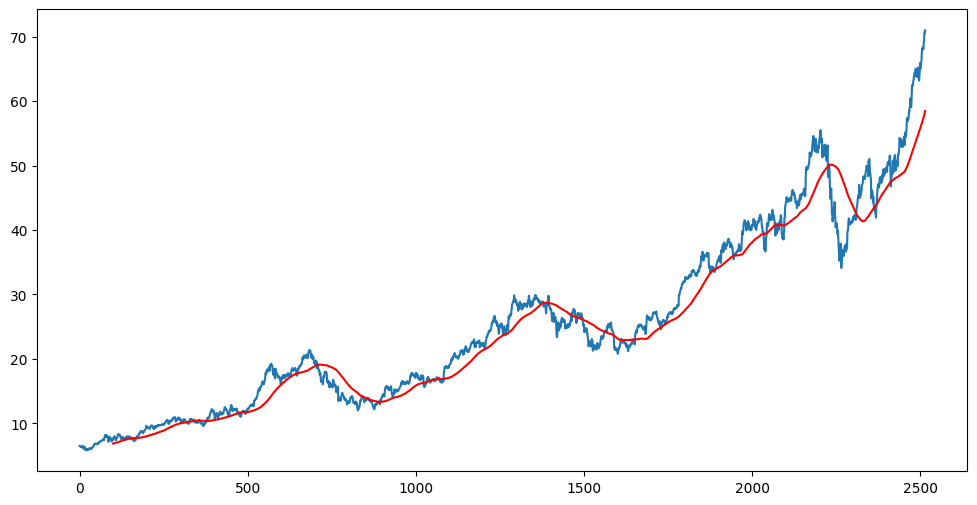

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

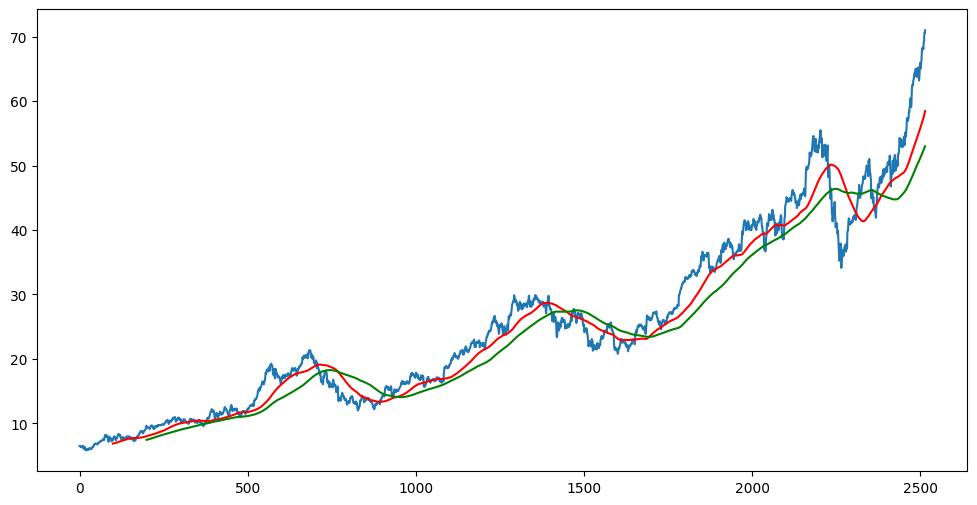

In [15]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
df.shape

(2515, 5)

In [18]:
#Spliting data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02760003],
       [0.02806513],
       [0.02377925],
       ...,
       [0.88408391],
       [0.89123179],
       [0.88640224]])

In [23]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
# ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [30]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 21s 284ms/step - loss: 0.0032
Epoch 2/50
52/52 [==============================] - 23s 443ms/step - loss: 0.0031
Epoch 3/50
52/52 [==============================] - 20s 387ms/step - loss: 0.0029
Epoch 4/50
52/52 [==============================] - 15s 281ms/step - loss: 0.0031
Epoch 5/50
52/52 [==============================] - 15s 283ms/step - loss: 0.0029
Epoch 6/50
52/52 [==============================] - 15s 280ms/step - loss: 0.0030
Epoch 7/50
52/52 [==============================] - 15s 280ms/step - loss: 0.0028
Epoch 8/50
52/52 [==============================] - 15s 282ms/step - loss: 0.0027
Epoch 9/50
52/52 [==============================] - 15s 285ms/step - loss: 0.0026
Epoch 10/50
52/52 [==============================] - 16s 303ms/step - loss: 0.0027
Epoch 11/50
52/52 [==============================] - 15s 282ms/step - loss: 0.0035
Epoch 12/50
52/52 [==============================] - 14s 271ms/step - loss: 0.0027
Epoch 13/50
5

In [31]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
past_100_days = data_training.tail(100)

In [33]:
final_df = past_100_days.append(data_testing, ignore_index= True)

<ipython-input-33-6ca3da9ae6a2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index= True)


In [34]:
final_df.head()

,Close
0,25.084805
1,25.186651
2,24.999155
3,24.982956
4,25.040827


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02573558],
       [0.02789655],
       [0.02391828],
       [0.02357457],
       [0.02480246],
       [0.03118719],
       [0.03069601],
       [0.02991012],
       [0.02922246],
       [0.03059795],
       [0.02642312],
       [0.02809299],
       [0.02406559],
       [0.02180652],
       [0.01871232],
       [0.01812292],
       [0.0140956 ],
       [0.01458662],
       [0.01768099],
       [0.02259237],
       [0.02244498],
       [0.02568645],
       [0.01173811],
       [0.        ],
       [0.01134523],
       [0.02367275],
       [0.0424342 ],
       [0.06109755],
       [0.05790501],
       [0.05132376],
       [0.0512748 ],
       [0.05117649],
       [0.05643171],
       [0.04705084],
       [0.04788581],
       [0.04891739],
       [0.0531409 ],
       [0.04444782],
       [0.04872087],
       [0.04611777],
       [0.04847521],
       [0.04872087],
       [0.05284628],
       [0.05368129],
       [0.06345504],
       [0.06468274],
       [0.06979055],
       [0.068

In [36]:
input_data.shape

(855, 1)

In [37]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [39]:
# Making predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 94ms/step


In [40]:
y_predicted.shape

(755, 1)

In [41]:
y_test

array([0.06973811, 0.06524575, 0.06687487, 0.06623313, 0.06914567,
       0.07556325, 0.08089471, 0.08148715, 0.08464659, 0.08217821,
       0.08114162, 0.08588075, 0.08583142, 0.08479467, 0.08588075,
       0.08627578, 0.08573272, 0.09516158, 0.0954579 , 0.09550711,
       0.09392741, 0.09254521, 0.12907607, 0.12798978, 0.13070494,
       0.13667817, 0.14279976, 0.14531726, 0.15002718, 0.14853988,
       0.15434086, 0.1629182 , 0.16534748, 0.16455436, 0.1663889 ,
       0.17124742, 0.17328034, 0.17040488, 0.17104916, 0.17238798,
       0.17268544, 0.18656756, 0.18245259, 0.18651811, 0.18433678,
       0.18522922, 0.18265097, 0.18106431, 0.18334527, 0.18364272,
       0.18260144, 0.18988989, 0.19102984, 0.18755956, 0.19484769,
       0.18681556, 0.19464922, 0.19217012, 0.19078209, 0.19197206,
       0.2064495 , 0.20803592, 0.20709394, 0.20575536, 0.2059535 ,
       0.21125853, 0.20754   , 0.20575536, 0.2041687 , 0.20332571,
       0.19569059, 0.19653358, 0.19281505, 0.1966821 , 0.19355

In [42]:
y_predicted

array([[0.16217357],
       [0.16312462],
       [0.16390619],
       [0.1645141 ],
       [0.16495827],
       [0.16527587],
       [0.16555408],
       [0.16590273],
       [0.16639271],
       [0.1670698 ],
       [0.16792539],
       [0.168906  ],
       [0.16997233],
       [0.1710861 ],
       [0.17219129],
       [0.17324552],
       [0.17422354],
       [0.17510782],
       [0.17595583],
       [0.17683405],
       [0.17777963],
       [0.1787859 ],
       [0.17981246],
       [0.18109003],
       [0.18280093],
       [0.18504003],
       [0.18784855],
       [0.1912192 ],
       [0.19507717],
       [0.19931895],
       [0.2037638 ],
       [0.2082786 ],
       [0.21281374],
       [0.21733622],
       [0.22179043],
       [0.22611962],
       [0.23029608],
       [0.23430039],
       [0.2380826 ],
       [0.24158989],
       [0.24478568],
       [0.2476491 ],
       [0.25027025],
       [0.25270498],
       [0.25501716],
       [0.25721797],
       [0.25929675],
       [0.261

In [43]:
scaler.scale_

array([0.02121785])

In [44]:
scale_factor = 1/0.02121785

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

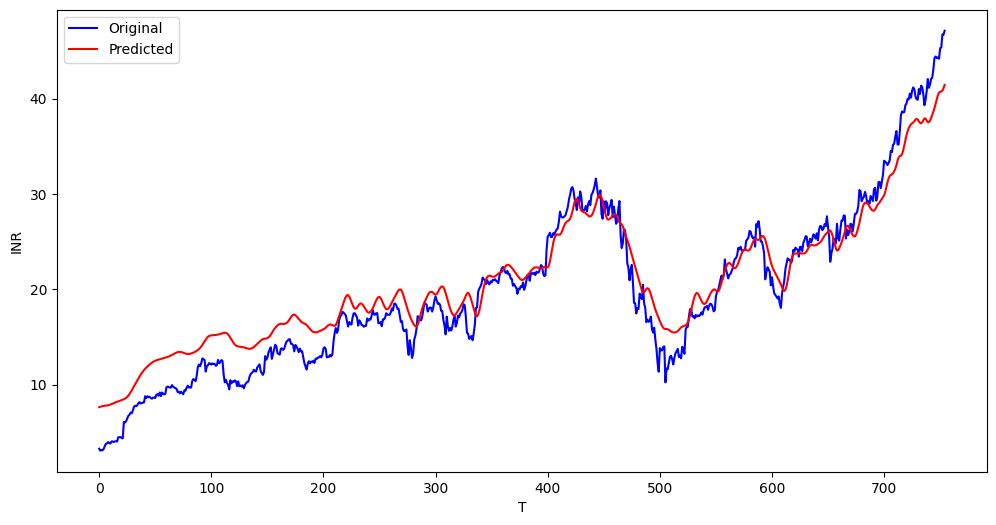

In [46]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original')
plt.plot(y_predicted, 'r', label = 'Predicted')
plt.xlabel('T')
plt.ylabel('INR')
plt.legend()
plt.show()